In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("./data/city_data.csv")
ride_df = pd.read_csv("./data/ride_data.csv")

# Combine the data into a single dataset
pyber_df = pd.merge(city_df, ride_df, on ="city", sort = "true", how = "left")
# Display the data table for preview
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
2,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
3,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
4,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


## Bubble Plot of Ride Sharing Data

No handles with labels found to put in legend.


['Urban' 'Suburban' 'Rural']


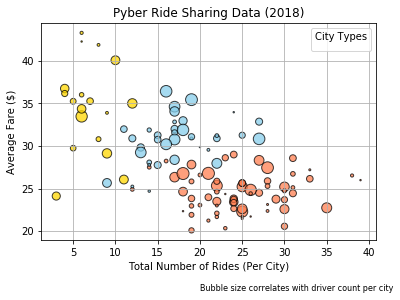

In [33]:
# Obtain the x and y coordinates for each of the three city types
city_group = pyber_df.groupby(["city"])
x_vals = pyber_df["city"].value_counts().sort_index()
y_vals = city_group["fare"].mean()
# Build the scatter plots for each city types

colors= { "Urban": "coral", "Suburban": "skyblue", "Rural": "gold"}
size = city_df["driver_count"]
# Incorporate the other graph properties
bubble_size = city_group["driver_count"].first()*10

# Create a legend

plt.legend(title="City Types", markerscale=0.10, loc="best")

# Label Chat

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")

# Incorporate a text label regarding circle size

plt.text(20,13,"Bubble size correlates with driver count per city", fontsize = 8)

# Save Figure

plt.scatter(x_vals, y_vals, s=size*2, c=[ colors[city_type] for city_type in city_group["type"].first() ], linewidth=1, edgecolor="black", alpha=0.75)
city_list = pyber_df["type"].unique()


plt.grid()

plt.savefig("./data/Pyber1.png")
print(city_list)


In [7]:
# Show plot
plt.show()

## Total Fares by City Type

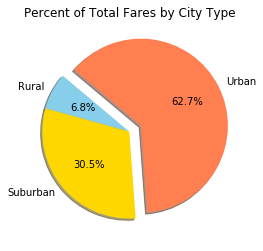

In [34]:
# Calculate Type Percents

group_type = pyber_df.groupby(["type"])
city_fare_total = group_type["fare"].sum()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

colors = {"gold", "coral", "skyblue"}
plt.title("Percent of Total Fares by City Type")
explode = (0,0,0.15)
# Save Figure

plt.pie(total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=140)

plt.show()


In [18]:
# Show Figure
plt.show()

## Total Rides by City Type

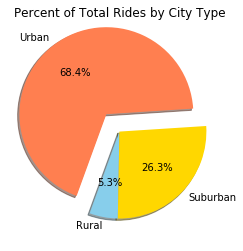

In [35]:
# Calculate Ride Percents
total_rides = group_type["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

colors = {"gold", "coral", "skyblue"}
plt.title("Percent of Total Rides by City Type")
explode = (0,0,0.25)

# Save Figure

plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=250)

plt.show()


In [24]:
# Show Figure
plt.show()

## Total Drivers by City Type

<function matplotlib.pyplot.show(*args, **kw)>

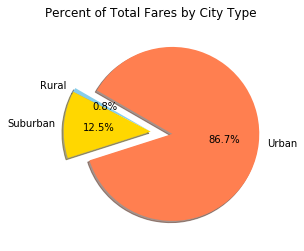

In [37]:
# Calculate Driver Percents
total_drivers = group_type["driver_count"].sum()

# Build Pie Charts

labels = ["Rural", "Suburban", "Urban"]

colors = {"gold", "coral", "skyblue"}
plt.title("Percent of Total Fares by City Type")

plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=150)

plt.show

# Save Figure


In [ ]:
# Show Figure
plt.show()

In [ ]:
Insights:
    
    1) Be a rural driver.  Less than one percent of drivers do so rurally, yet nearly 
    7% of the fares are made there.  Compare that to 86 and 63 for urban drivers
    and there is a clear difference of opportunity.
    
    2) You're also better off being a suburban driver than an urban driver.  Only
    about 13% of drivers do so in the suburbs and they take over 30% of the pie.
    You have a much better money making opportunity driving in the suburbs than in the city.
    
    3) One missing data point that could have a significant effect on the above two
    insights is the length of each trip.  If urban trips are significantly shorter in 
    time than the other two types, more money can be made driving urban.  This piece of
    data would go a long way as an explanation in the difference in location choices
    for drivers.